In [31]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
import re

In [ ]:
import matplotlib as plt

In [ ]:
df = pd.read_csv('/Users/jaredhuzar/alz/alz/con4.csv')

In [ ]:
df.head()

In [ ]:
df=df[-df["POST_CONTENT"].isnull()]

In [ ]:
df['POST_CONTENT'] = df['POST_CONTENT'].apply(lambda x: re.sub('[,\.!?]', '', str(x)))

In [ ]:
df['POST_CONTENT'] = df['POST_CONTENT'].apply(lambda x: x.lower())

In [ ]:
import wordcloud
from wordcloud import WordCloud

In [ ]:
long_string = ','.join(list(df["POST_CONTENT"].values))

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [ ]:
wordcloud.generate(long_string)

In [ ]:
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
stops = stopwords.words('english')

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stops] for doc in texts]
data = df.POST_CONTENT.values.tolist()
data_words = list(sent_to_words(data))

In [ ]:
data_words = remove_stopwords(data_words)

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
#print(corpus[:1][0][:30])

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model1 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model1.print_topics())
doc_lda = lda_model1[corpus]

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 

In [ ]:
import os

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model1, corpus, id2word)
LDAvis_prepared

In [ ]:
def get_textBlob_score(sent):
    # This polarity score is between -1 to 1
    polarity = TextBlob(sent).sentiment.polarity
    return polarity

In [ ]:
def getBinary(val):
    if(val < 0):
        val = -1
    elif(val == 0):
        val = 0
    else:
        val = 1
    return val

In [ ]:
def get_nltk_score(sent):
    polarity = sia.polarity_scores(sent)['compound']
    return polarity

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()

In [ ]:
df["Sentiment"] = np.nan

In [ ]:
df['Sentiment'] = df['POST_CONTENT'].apply(lambda x: get_textBlob_score(x))

In [ ]:
df['Sentiment'] = df['Sentiment'].apply(lambda x: getBinary(x))

In [ ]:
neg_df = df[df['Sentiment'] == -1]
data = neg_df.POST_CONTENT.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]
num_topics = 10

lda_model2 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pprint(lda_model2.print_topics())
doc_lda = lda_model2[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model2, corpus, id2word)
LDAvis_prepared

In [ ]:
pos_df = df[df['Sentiment'] == 1]
data = pos_df.POST_CONTENT.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]
num_topics = 10

lda_model3 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pprint(lda_model3.print_topics())
doc_lda = lda_model3[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model3, corpus, id2word)
LDAvis_prepared

In [ ]:
mdiff, annotation=lda_model2.diff(lda_model3, distance ='jaccard')

In [33]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [34]:
from nltk.util import ngrams

In [35]:
from collections import Counter
from nltk import word_tokenize

In [36]:
bi_g = []
for x in range(len(data_words)):
    bigrams = ngrams(data_words[x],2)
    bi_g.append(list(bigrams))

In [37]:
import collections

In [38]:
#flat_list = []
for sublist in list(bi_g):
    for i in range(len(sublist)):
       sublist[i] = '_'.join(sublist[i])

In [39]:
#freq = Counter(flat_list)
#freq.most_common(10)

In [40]:
id2word = corpora.Dictionary(list(bi_g))
# Create Corpus
texts = list(bi_g)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [41]:
#output_list = ['_'.join(i) for i in flat_list]

In [42]:
num_topics = 10

lda_model4 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pprint(lda_model4.print_topics())
doc_lda = lda_model4[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model4, corpus, id2word)
LDAvis_prepared

[(0,
  '0.001*"memory_care" + 0.001*"assisted_living" + 0.001*"nursing_home" + '
  '0.001*"one_day" + 0.001*"long_term" + 0.000*"elder_law" + '
  '0.000*"sounds_like" + 0.000*"even_though" + 0.000*"make_sure" + '
  '0.000*"feel_like"'),
 (1,
  '0.000*"memory_care" + 0.000*"sounds_like" + 0.000*"take_care" + '
  '0.000*"good_luck" + 0.000*"make_sure" + 0.000*"nursing_home" + '
  '0.000*"long_term" + 0.000*"geriatric_psychiatrist" + 0.000*"feel_like" + '
  '0.000*"assisted_living"'),
 (2,
  '0.001*"years_ago" + 0.001*"memory_care" + 0.001*"take_care" + '
  '0.001*"make_sure" + 0.001*"nursing_home" + 0.001*"feel_like" + '
  '0.001*"even_though" + 0.001*"sounds_like" + 0.001*"assisted_living" + '
  '0.001*"go_home"'),
 (3,
  '0.001*"take_care" + 0.001*"memory_care" + 0.000*"sounds_like" + '
  '0.000*"feel_like" + 0.000*"nursing_home" + 0.000*"good_luck" + '
  '0.000*"years_ago" + 0.000*"make_sure" + 0.000*"assisted_living" + '
  '0.000*"loved_one"'),
 (4,
  '0.002*"memory_care" + 0.001*"nu

/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.057174  0.056681       1        1  16.707124
2      0.045358 -0.057181       2        1  16.428583
4      0.018043 -0.014518       3        1  13.024236
7     -0.004452 -0.001845       4        1  10.444814
5     -0.017061 -0.001076       5        1   9.015933
6     -0.014023  0.004408       6        1   8.186098
9     -0.013430  0.003271       7        1   8.128752
0     -0.015685 -0.000383       8        1   7.739101
3     -0.021211  0.004259       9        1   6.846863
1     -0.034713  0.006385      10        1   3.478497, topic_info=                Term         Freq        Total Category  logprob  loglift
1763     memory_care  2438.000000  2438.000000  Default  30.0000  30.0000
589      sounds_like  1578.000000  1578.000000  Default  29.0000  29.0000
5537         one_day   756.000000   756.000000  Default  28.0000  28.0000
9728    nursing_home  1294.000000  1294.000000  Default  27.0000  27.0000
8342       elder_law   716.000000   716.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
9833   social_worker    11.221138   678.102000  Topic10  -9.0027  -0.7429
1497       every_day    11.894137  1017.382896  Topic10  -8.9445  -1.0904
4204        year_old    11.154327   756.614707  Topic10  -9.0087  -0.8585
4733  family_members    10.983888   740.688673  Topic10  -9.0241  -0.8526
8342       elder_law    10.864379   716.862197  Topic10  -9.0350  -0.8308

[891 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
5067       1  0.137118         able_get
5067       2  0.246443         able_get
5067       3  0.190854         able_get
5067       4  0.048177         able_get
5067       5  0.083383         able_get
...      ...       ...              ...
40820      6  0.075026  younger_brother
40820      7  0.075026  younger_brother
40820      8  0.010718  younger_brother
40820      9  0.032154  younger_brother
40820     10  0.064308  younger_brother

[2311 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 5, 8, 6, 7, 10, 1, 4, 2])

In [43]:
data = neg_df.POST_CONTENT.values.tolist()
data_words = list(sent_to_words(data))

In [44]:
data_words = remove_stopwords(data_words)

In [45]:
bi_g = []
for x in range(len(data_words)):
    bigrams = ngrams(data_words[x],2)
    bi_g.append(list(bigrams))

In [46]:
for sublist in list(bi_g):
    for i in range(len(sublist)):
       sublist[i] = '_'.join(sublist[i])

In [47]:
id2word = corpora.Dictionary(list(bi_g))
# Create Corpus
texts = list(bi_g)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [48]:
num_topics = 10

lda_model5 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pprint(lda_model5.print_topics())
doc_lda = lda_model5[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model5, corpus, id2word)
LDAvis_prepared

[(0,
  '0.001*"memory_care" + 0.000*"years_ago" + 0.000*"take_care" + '
  '0.000*"let_go" + 0.000*"sounds_like" + 0.000*"even_though" + '
  '0.000*"go_home" + 0.000*"every_day" + 0.000*"feel_like" + '
  '0.000*"sorry_loss"'),
 (1,
  '0.000*"take_care" + 0.000*"sounds_like" + 0.000*"even_though" + '
  '0.000*"memory_care" + 0.000*"feel_like" + 0.000*"every_day" + '
  '0.000*"years_ago" + 0.000*"assisted_living" + 0.000*"year_old" + '
  '0.000*"person_dementia"'),
 (2,
  '0.001*"take_care" + 0.000*"feel_like" + 0.000*"even_though" + '
  '0.000*"memory_care" + 0.000*"long_term" + 0.000*"years_ago" + '
  '0.000*"months_ago" + 0.000*"sorry_loss" + 0.000*"sounds_like" + '
  '0.000*"let_go"'),
 (3,
  '0.001*"take_care" + 0.001*"memory_care" + 0.000*"years_ago" + '
  '0.000*"sorry_loss" + 0.000*"nursing_home" + 0.000*"feel_like" + '
  '0.000*"sounds_like" + 0.000*"even_though" + 0.000*"year_old" + '
  '0.000*"go_home"'),
 (4,
  '0.000*"feel_like" + 0.000*"memory_care" + 0.000*"years_ago" + '
 

/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.016978  0.050567       1        1  10.890869
9     -0.017915 -0.041096       2        1  10.735334
8     -0.038694 -0.015620       3        1  10.648295
7      0.066871 -0.041380       4        1  10.597461
0      0.009647  0.036689       5        1  10.517789
6     -0.035131 -0.001874       6        1  10.186781
4      0.009923  0.011021       7        1   9.548666
5     -0.019259 -0.009739       8        1   9.382005
1      0.010740 -0.008100       9        1   8.960632
2     -0.003160  0.019533      10        1   8.532167, topic_info=                   Term       Freq       Total Category  logprob  loglift
303687       motor_home  14.000000   14.000000  Default  30.0000  30.0000
13371        going_gets  12.000000   12.000000  Default  29.0000  29.0000
307080       gets_tough  11.000000   11.000000  Default  28.0000  28.0000
148078       feel_grief   9.000000    9.000000  Default  27.0000  27.0000
253736      teaching_us   7.000000    7.000000  Default  26.0000  26.0000
...                 ...        ...         ...      ...      ...      ...
4284     family_members   6.700751   77.235671  Topic10  -8.7333   0.0167
7180          every_day   7.817462  135.279379  Topic10  -8.5792  -0.3897
1870         trying_get   6.314115   69.556702  Topic10  -8.7928   0.0620
838          every_time   6.464236   75.991316  Topic10  -8.7693  -0.0030
3197    assisted_living   6.780463  112.372289  Topic10  -8.7215  -0.3464

[778 rows x 6 columns], token_table=        Topic      Freq                       Term
term                                              
268087      9  0.414026      absolutely_unbearable
278088      2  0.774935                 abused_get
113041      1  0.484543              abusive_would
172325      9  0.725215                afraid_walk
262392     10  0.867136               aging_locate
...       ...       ...                        ...
7037        9  0.094650                  years_old
7037       10  0.118313                  years_old
143870      4  0.494278                  yes_brain
276519      6  0.628586                  youit_fun
269261      1  0.611053  yourfairy_talecomparisons

[1789 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 9, 8, 1, 7, 5, 6, 2, 3])

In [49]:
data = pos_df.POST_CONTENT.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
bi_g = []
for x in range(len(data_words)):
    bigrams = ngrams(data_words[x],2)
    bi_g.append(list(bigrams))
for sublist in list(bi_g):
    for i in range(len(sublist)):
       sublist[i] = '_'.join(sublist[i])
id2word = corpora.Dictionary(list(bi_g))
# Create Corpus
texts = list(bi_g)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
num_topics = 10

lda_model6 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pprint(lda_model6.print_topics())
doc_lda = lda_model6[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model6, corpus, id2word)
LDAvis_prepared

[(0,
  '0.000*"sounds_like" + 0.000*"take_care" + 0.000*"go_home" + '
  '0.000*"memory_care" + 0.000*"good_luck" + 0.000*"make_sure" + '
  '0.000*"years_ago" + 0.000*"assisted_living" + 0.000*"long_term" + '
  '0.000*"every_day"'),
 (1,
  '0.001*"take_care" + 0.001*"years_ago" + 0.001*"good_luck" + '
  '0.001*"make_sure" + 0.001*"loved_one" + 0.001*"even_though" + '
  '0.000*"feel_like" + 0.000*"sounds_like" + 0.000*"long_term" + '
  '0.000*"would_like"'),
 (2,
  '0.001*"memory_care" + 0.000*"sounds_like" + 0.000*"assisted_living" + '
  '0.000*"feel_like" + 0.000*"even_though" + 0.000*"take_care" + '
  '0.000*"make_sure" + 0.000*"nursing_home" + 0.000*"long_term" + '
  '0.000*"care_facility"'),
 (3,
  '0.001*"memory_care" + 0.001*"sounds_like" + 0.000*"care_facility" + '
  '0.000*"loved_one" + 0.000*"good_luck" + 0.000*"years_ago" + '
  '0.000*"even_though" + 0.000*"assisted_living" + 0.000*"feel_like" + '
  '0.000*"every_day"'),
 (4,
  '0.001*"sounds_like" + 0.001*"nursing_home" + 0.0

/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/sputils.py:17: Deprecat

/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated

/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated

/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.061571 -0.051138       1        1  18.780121
7     -0.046657  0.064143       2        1  17.353409
6     -0.011599  0.000546       3        1  11.561359
5      0.000063 -0.006521       4        1  10.758349
3      0.010620 -0.002879       5        1   8.791801
1      0.015137  0.001267       6        1   8.452968
9      0.016041 -0.000399       7        1   6.873646
0      0.026281 -0.003283       8        1   6.059113
2      0.026236 -0.001130       9        1   5.692097
4      0.025449 -0.000605      10        1   5.677136, topic_info=                Term         Freq        Total Category  logprob  loglift
2586       take_care  1877.000000  1877.000000  Default  30.0000  30.0000
9728    nursing_home  1332.000000  1332.000000  Default  29.0000  29.0000
177590   wishes_greg    79.000000    79.000000  Default  28.0000  28.0000
365120  away_thought    54.000000    54.000000  Default  27.0000  27.0000
583        years_ago  1480.000000  1480.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
3850      months_ago    23.559685   547.602707  Topic10  -8.7508  -0.2773
500        last_year    23.129884   498.266483  Topic10  -8.7692  -0.2013
2576      short_term    23.467710   573.567753  Topic10  -8.7547  -0.3275
2423     pretty_much    22.863889   487.635226  Topic10  -8.7808  -0.1913
2848      loved_ones    22.907962   770.676842  Topic10  -8.7789  -0.6471

[894 rows x 6 columns], token_table=        Topic      Freq            Term
term                                   
527276      9  0.849751  ability_things
5067        1  0.177502        able_get
5067        2  0.206131        able_get
5067        3  0.116426        able_get
5067        4  0.124060        able_get
...       ...       ...             ...
99698       6  0.084939  younger_sister
99698       7  0.056626  younger_sister
99698       8  0.028313  younger_sister
99698       9  0.028313  younger_sister
99698      10  0.368071  younger_sister

[2261 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 7, 6, 4, 2, 10, 1, 3, 5])

In [61]:
mdiff, annotation=lda_model2.diff(lda_model3, distance ='jaccard')

In [65]:
mdiff2, annotation2=lda_model4.diff(lda_model5, distance ='jaccard')

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [14]:
df["Sentiment_NLTK"] = np.nan

In [15]:
df['Sentiment_NLTK'] = df['POST_CONTENT'].apply(lambda x: get_nltk_score(x))

In [16]:
df['Sentiment_NLTK'] = df['Sentiment_NLTK'].apply(lambda x: getBinary(x))

In [17]:
df.head()

,THREAD_HEADING,USER,POST_DATE,USER_JOIN_DATE,USER_PROFILE_POSTS,POST_CONTENT,QUESTION,Sentiment,Sentiment_NLTK
0,New here.(2),moxvox,"Tuesday, February 15, 2022 12:48 PM",Joined: 2/15/2022,Posts: 2,Hi all: My mother was diagnosed around a year ...,YES,1,-1
1,New here.(2),SusanB-dil,"Tuesday, February 15, 2022 1:18 PM",Joined: 9/10/2021,Posts: 156,Hi moxvox - welcome to 'here'... A lot of su...,NO,1,1
2,New here.(2),moxvox,"Tuesday, February 15, 2022 2:00 PM",Joined: 2/15/2022,Posts: 2,Hi Susan:Thanks for your words of encouragemen...,NO,1,1
3,New here.(2),SusanB-dil,"Tuesday, February 15, 2022 2:27 PM",Joined: 9/10/2021,Posts: 156,Do tell her neurologist. If no HIPAA access i...,NO,1,1
4,New here.(2),LicketyGlitz,"Tuesday, February 15, 2022 3:56 PM",Joined: 2/3/2018,Posts: 1088,"Dementia often strains family relations, mox, ...",NO,1,1


In [18]:
df.to_csv("SentimentAlz.csv")

<AxesSubplot:>

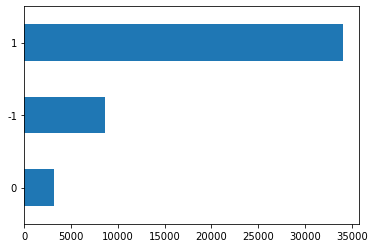

In [19]:
df.Sentiment.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

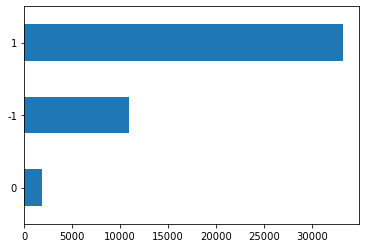

In [20]:
df.Sentiment_NLTK.value_counts().sort_values().plot(kind = 'barh')

In [21]:
len(df.USER.unique())

4449

In [22]:
len(df.THREAD_HEADING.unique())

5597

In [23]:
len(df)

45927

In [24]:
df.USER.value_counts()

harshedbuzz      1263
jfkoc            1206
M1                940
abc123            723
Jo C.             723
                 ... 
nhcurealz           1
Jennkidd            1
WhiteBearKite       1
cdn13               1
MandyPonder         1
Name: USER, Length: 4449, dtype: int64

<AxesSubplot:>

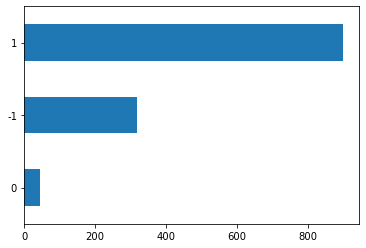

In [25]:
df[df['USER'] == 'harshedbuzz'].Sentiment_NLTK.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

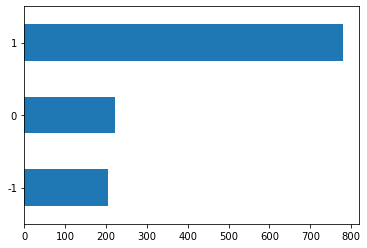

In [26]:
df[df['USER'] == 'jfkoc'].Sentiment_NLTK.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

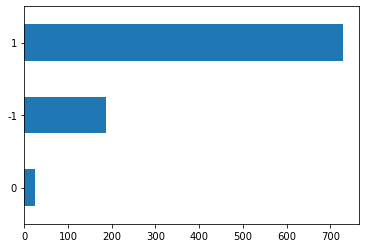

In [27]:
df[df['USER'] == 'M1'].Sentiment_NLTK.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

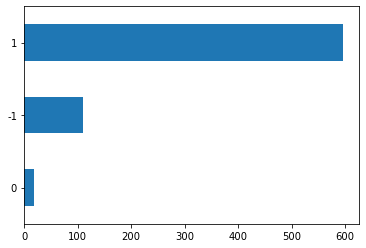

In [28]:
df[df['USER'] == 'abc123'].Sentiment_NLTK.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

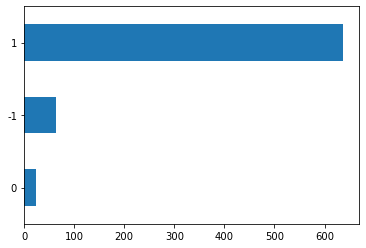

In [29]:
df[df['USER'] == 'Jo C.'].Sentiment_NLTK.value_counts().sort_values().plot(kind = 'barh')

In [30]:
df.THREAD_HEADING.value_counts()

SHARE A JOKE                                                    443
FEEL GODD STUFF                                                 239
Please Share a Thought or Quote For Today                       120
Alzheimers Association Apology.                                 106
Caregiver Information for New Forum Members                      79
                                                               ... 
Bible Verse to Lift You Up 4/ 7 / 18 ONE THING TODAY!             1
Bible Verse to Lift You Up 3/16 /18 FRIDAY                        1
reposting— FOR MEGPIESMOM                                         1
Bible Verse to Lift You Up 4/ 4 /18 JESUS, OUR GOOD SHEPHERD      1
Bible Verse to Lift You Up 6/16/18 Rest Needed!                   1
Name: THREAD_HEADING, Length: 5597, dtype: int64

<AxesSubplot:>

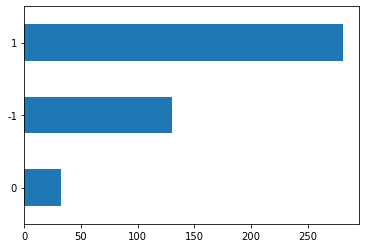

In [31]:
df[df['THREAD_HEADING'] == 'SHARE A JOKE'].Sentiment_NLTK.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

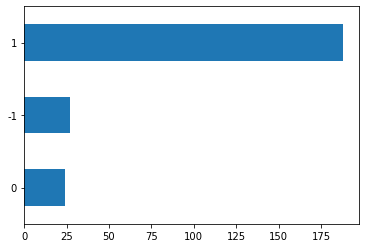

In [32]:
df[df['THREAD_HEADING'] == 'FEEL GODD STUFF'].Sentiment_NLTK.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

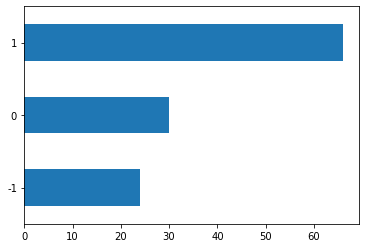

In [33]:
df[df['THREAD_HEADING'] == 'Please Share a Thought or Quote For Today'].Sentiment_NLTK.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

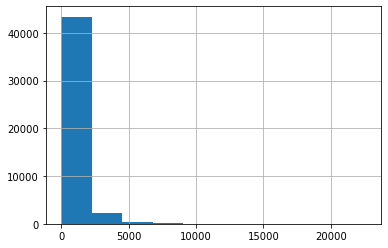

In [34]:
df['POST_CONTENT'].str.len().hist()

In [35]:
df.head()

,THREAD_HEADING,USER,POST_DATE,USER_JOIN_DATE,USER_PROFILE_POSTS,POST_CONTENT,QUESTION,Sentiment,Sentiment_NLTK
0,New here.(2),moxvox,"Tuesday, February 15, 2022 12:48 PM",Joined: 2/15/2022,Posts: 2,Hi all: My mother was diagnosed around a year ...,YES,1,-1
1,New here.(2),SusanB-dil,"Tuesday, February 15, 2022 1:18 PM",Joined: 9/10/2021,Posts: 156,Hi moxvox - welcome to 'here'... A lot of su...,NO,1,1
2,New here.(2),moxvox,"Tuesday, February 15, 2022 2:00 PM",Joined: 2/15/2022,Posts: 2,Hi Susan:Thanks for your words of encouragemen...,NO,1,1
3,New here.(2),SusanB-dil,"Tuesday, February 15, 2022 2:27 PM",Joined: 9/10/2021,Posts: 156,Do tell her neurologist. If no HIPAA access i...,NO,1,1
4,New here.(2),LicketyGlitz,"Tuesday, February 15, 2022 3:56 PM",Joined: 2/3/2018,Posts: 1088,"Dementia often strains family relations, mox, ...",NO,1,1


In [36]:
from datetime import datetime

In [37]:
df['POST_DATE'] = df['POST_DATE'].apply(lambda x: datetime.strptime(x, '%A, %B %d, %Y %I:%M %p'))

<AxesSubplot:xlabel='POST_DATE'>

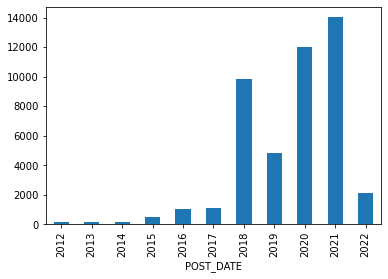

In [38]:
df.groupby(df["POST_DATE"].dt.year).count()['THREAD_HEADING'].plot(kind="bar")

In [39]:
df['POST_CONTENT'] = df['POST_CONTENT'].apply(lambda x: x.replace(u'\xa0', u' '))

In [40]:
df['POST_LEN'] = df['POST_CONTENT'].apply(lambda x: len(x.split()))

<AxesSubplot:>

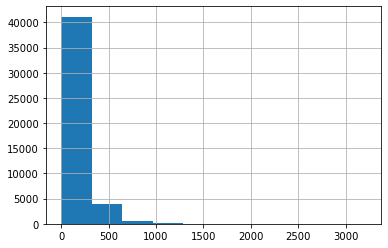

In [41]:
df['POST_LEN'].hist()

In [42]:
#nltk.download('stopwords')
#stop=set(stopwords.words('english'))

In [43]:
#counts_mat
#def getCounts(features):
#    features = str(features).lower()
#    features = features.replace("."," ")
#    words = TextBlob(features).words 
#    return [word.lemma for word in words]
#bow = CountVectorizer(analyzer=split_into_lemmas).fit_transform(df['POST_CONTENT'])
#X = vectorizer.fit_transform([doc1,doc2,doc3])
#df_bow_sklearn = pd.DataFrame(bow.toarray(),columns=bow.get_feature_names())
#df_bow_sklearn.head()
#print ("Length of Vocabulary : "+str(len(bow.vocabulary_)))

In [44]:
#len(getCounts(df.loc[1,'POST_CONTENT']))

In [45]:
#pd.DataFrame(CountVectorizer(analyzer=split_into_lemmas).fit_transform(df.loc[1:2,'POST_CONTENT']).toarray())

In [46]:
#cv=CountVectorizer(stop_words='english')
#X = cv.fit_transform(df['POST_CONTENT'])

In [47]:
#counts=pd.DataFrame(X.toarray())

In [48]:
#counts.columns = cv.get_feature_names_out()

In [49]:
#cv.get_feature_names_out()[0:50]

In [50]:
#counts.head()

In [51]:
#counts.columns

In [52]:
#count = pd.DataFrame(np.nan, index = list(counts.columns), columns = ['count'])

In [53]:
#for x in range(len(counts.columns)):
#    col1 = counts.columns[x]
#    count.at[col1,'count'] = counts[col1].sum()

In [54]:
#count.head()

In [55]:
#sum(count['count'])

In [56]:
#count['count'][10:50]

In [57]:
#count['count'].sort_values(ascending=False)[1:20]

In [58]:
#count['count'].sort_values(ascending=False)[1:20].plot(kind='bar')

In [59]:
#Perform differential for positive vs neutral vs negative by subsetting data and then finding difference between word frequency

In [60]:
pos_df = df[df['Sentiment'] == 1]

In [61]:
neg_df = df[df['Sentiment'] == -1]

In [62]:
#df['Sentiment'] == 1

In [63]:
cv2=CountVectorizer(stop_words='english')
X2 = cv2.fit_transform(pos_df['POST_CONTENT'])

In [64]:
counts2=pd.DataFrame(X2.toarray())

In [65]:
counts2.columns = cv2.get_feature_names_out()

In [66]:
count2 = pd.DataFrame(np.nan, index = list(counts2.columns), columns = ['count'])

In [67]:
for x in range(len(counts2.columns)):
    col1 = counts2.columns[x]
    count2.at[col1,'count'] = counts2[col1].sum()

In [73]:
count2['count'].sort_values(ascending=False)[1:20]

care        21739.0
just        18930.0
time        18224.0
know        15428.0
like        15281.0
help        13666.0
home        13530.0
dementia    13390.0
good        13284.0
dad         12504.0
mother      11884.0
don         11867.0
day         10588.0
things      10398.0
need        10240.0
think        9722.0
going        9637.0
make         9037.0
did          8485.0
Name: count, dtype: float64

<AxesSubplot:>

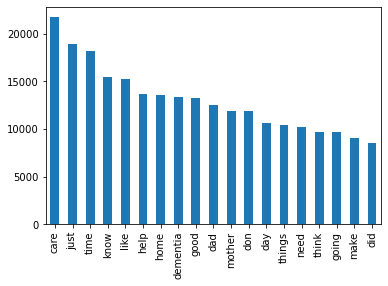

In [74]:
count2['count'].sort_values(ascending=False)[1:20].plot(kind='bar')

In [76]:
#count2.to_csv("Pos_Counts.csv")

In [77]:
cv3=CountVectorizer(stop_words='english')
X3 = cv3.fit_transform(neg_df['POST_CONTENT'])

In [78]:
counts3=pd.DataFrame(X3.toarray())

In [79]:
counts3.columns = cv3.get_feature_names_out()

In [80]:
count3 = pd.DataFrame(np.nan, index = list(counts3.columns), columns = ['count'])

In [81]:
for x in range(len(counts3.columns)):
    col1 = counts3.columns[x]
    count3.at[col1,'count'] = counts3[col1].sum()

In [82]:
count3['count'].sort_values(ascending=False)[1:20]

just        4382.0
time        3450.0
know        3266.0
like        3098.0
care        2965.0
don         2627.0
home        2592.0
help        2576.0
dad         2560.0
mother      2410.0
dementia    2341.0
day         2148.0
going       2106.0
things      2033.0
think       1851.0
sorry       1729.0
years       1665.0
did         1596.0
said        1578.0
Name: count, dtype: float64

<AxesSubplot:>

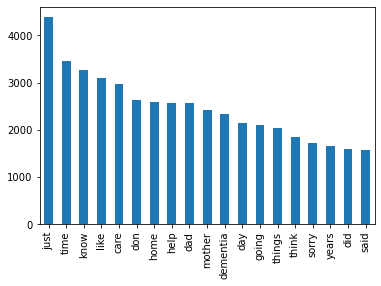

In [83]:
count3['count'].sort_values(ascending=False)[1:20].plot(kind='bar')

In [85]:
count2.index[1]

'000'

In [86]:
posCounts = set(count2.index)
NegCounts = set(count3.index)
intersection = posCounts.intersection(NegCounts)

In [90]:
len(intersection)

18474

In [96]:
intersection = list(intersection)

In [102]:
intersection[0:50]

['crossroad',
 'actively',
 'athletic',
 'passengers',
 'dismantling',
 'speedo',
 'alzstore',
 'crew',
 'pia',
 'fairy',
 'parameters',
 'dejected',
 'promised',
 'alheimers',
 'ruptures',
 'twc',
 'bethmimi',
 'stuffs',
 'only1bones',
 'nearly',
 'infecting',
 'mind',
 'continent',
 'hydroxyzine',
 'slipper',
 'administrator',
 'promoted',
 'practically',
 'examining',
 'abuses',
 'knelt',
 'laws',
 'homedepot',
 'typo',
 'planner',
 'drain',
 'contentious',
 'rounding',
 'bases',
 'consecutive',
 'definition',
 'considers',
 'excusing',
 'intruder',
 'braces',
 'cleared',
 'euthanasia',
 'licenses',
 'galatians',
 'ads']

In [125]:
dif = []
retBest = 0
retVal = []
retWorst = []
for val in intersection:
    posCount = count2.loc[val,'count']
    negCount = count3.loc[val,'count']
    ret = posCount-negCount
    if(ret >= 5000):
        #retBest = ret
        retVal.append(val)
    if(ret < -2):
        #retWorst = ret
        retWorst.append(val)
    dif.append(ret)

In [126]:
retVal

['good',
 'just',
 'going',
 'facility',
 'don',
 'able',
 'people',
 'does',
 'family',
 'things',
 'sure',
 'home',
 'mother',
 'think',
 'dad',
 'years',
 'like',
 'right',
 'did',
 'help',
 'know',
 'care',
 'need',
 'way',
 'time',
 'want',
 'make',
 'day',
 'best',
 'dementia',
 'said',
 'really',
 'work',
 'mom']

In [127]:
retWorst

['alzstore',
 'outraged',
 'perm',
 'hysterical',
 'yawning',
 'reindeer',
 'prevagen',
 'wronged',
 'robbery',
 'shoveling',
 'nasty',
 'irving',
 'jamestown',
 'moron',
 'mannose',
 'sighs',
 'embarassed',
 'encephalitis',
 'mickey',
 'begining',
 'wolf',
 'enacting',
 'pseudodementia',
 'hysterically',
 'dodged',
 'slapping',
 'hyperlink',
 'promotes',
 'ostriches',
 'marine',
 'jags',
 '1965',
 'vertigo',
 'knockwho',
 'stewart',
 'ranger',
 'bella',
 'mocked',
 'overuse',
 'tremble',
 'diff',
 'blackberries',
 'siding',
 'discord',
 'abusers',
 'ruff',
 'anniversery',
 'ezekiel',
 'bitterly',
 'excruciatingly',
 'icky',
 'youre',
 'lola',
 'jonah',
 'saloon',
 'monkeys',
 'outrageous',
 'aas',
 'panics',
 'doingmebest',
 'vicious',
 'vaginal']

In [131]:
len(pos_df)

34056

In [132]:
len(neg_df)

8674

In [137]:
count2.head()

,count,countN
00,227.0,0.006665
000,352.0,0.010336
000133,1.0,0.000029
000malachiteround,1.0,0.000029
001,1.0,0.000029


In [134]:
posNormal = count2['count'].apply(lambda x: x/len(pos_df))

In [138]:
negNormal = count3['count'].apply(lambda x: x/len(neg_df))

In [139]:
#count2['countN'] = posNormal
count3['countN'] = negNormal

In [154]:
dif = []
retBest = 0
retVal = []
retWorst = []
for val in intersection:
    posCount = count2.loc[val,'countN']
    negCount = count3.loc[val,'countN']
    ret = posCount-negCount
    if(ret >= .1):
        #retBest = ret
        retVal.append(val)
    if(ret < -.02):
        #retWorst = ret
        retWorst.append(val)
    dif.append(ret)

In [144]:
max(dif)

0.29650483715492215

In [156]:
len(retVal)

10

In [157]:
retVal

['good',
 'able',
 'help',
 'care',
 'need',
 'time',
 'make',
 'best',
 'dementia',
 'mom']

In [155]:
len(retWorst)

17

In [158]:
retWorst

['hate',
 'grief',
 'afraid',
 'awful',
 'difficult',
 'worse',
 'hard',
 'horrible',
 'mad',
 'anger',
 'sick',
 'sad',
 'angry',
 'wrong',
 'sorry',
 'bad',
 'terrible']